## Training Random Forest Model Applying SFS

### Step 1 | Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from plot_confusion_matrix import plot_confusion_matrix

### Step 2 | Import preprocessed dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Train model with selected hyperparameter from tuning function and applying SFS

In [4]:
rf = RandomForestClassifier(criterion= 'entropy',
 max_depth = None,
 max_features = 'sqrt',
 n_estimators = 900,
 random_state = 42)

In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=False)

pipe = Pipeline([
    ('sfs', SequentialFeatureSelector(rf, n_features_to_select='auto', tol=None, direction='forward', scoring="accuracy", cv=cv, n_jobs=-1)),
    ('rf', rf)
])

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sfs',
                 SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                           estimator=RandomForestClassifier(criterion='entropy',
                                                                            n_estimators=900,
                                                                            random_state=42),
                                           n_jobs=-1, scoring='accuracy')),
                ('rf',
                 RandomForestClassifier(criterion='entropy', n_estimators=900,
                                        random_state=42))])

In [7]:
selected_features = X_train.columns[pipe.named_steps['sfs'].get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['Gender', 'Age', 'Height', 'Weight', 'FAVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC']


In [8]:
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]

In [9]:
y_pred = rf.predict(X_train_sfs)
accuracy = accuracy_score(y_train, y_pred)
print(classification_report(y_train, y_pred, digits=4))

C:\Users\minhz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0     0.9936    0.9990    0.9963      2018
           1     0.9959    0.9931    0.9945      2465
           2     0.9933    0.9923    0.9928      1942
           3     0.9970    0.9970    0.9970      2018
           4     0.9991    0.9983    0.9987      2328
           5     1.0000    1.0000    1.0000      2598
           6     1.0000    1.0000    1.0000      3237

    accuracy                         0.9974     16606
   macro avg     0.9970    0.9971    0.9970     16606
weighted avg     0.9974    0.9974    0.9973     16606



In [10]:
y_pred = rf.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=4))

C:\Users\minhz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0     0.9256    0.9366    0.9311       505
           1     0.8636    0.8622    0.8629       617
           2     0.8103    0.7485    0.7781       485
           3     0.7973    0.8194    0.8082       504
           4     0.8838    0.9021    0.8929       582
           5     0.9678    0.9723    0.9701       650
           6     0.9926    0.9963    0.9944       809

    accuracy                         0.9017      4152
   macro avg     0.8916    0.8911    0.8911      4152
weighted avg     0.9012    0.9017    0.9013      4152



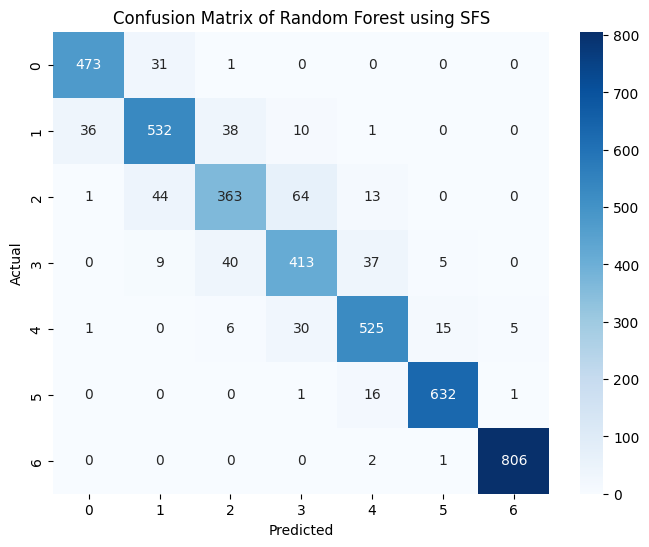

In [11]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix of Random Forest using SFS')